<a href="https://colab.research.google.com/github/pa-shk/embeddings_mixup/blob/main/inference.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install datasets -q

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 507.1/507.1 kB 3.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.3/115.3 kB 3.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 5.0 MB/s eta 0:00:00


# Prediction

In [2]:
from datasets import load_dataset
from transformers import pipeline
from tqdm.notebook import tqdm

In [3]:
dataset = load_dataset("rotten_tomatoes")
dataset

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


Generating train split:   0%|          | 0/8530 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/1066 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/1066 [00:00<?, ? examples/s]

DatasetDict({
    train: Dataset({
        features: ['text', 'label'],
        num_rows: 8530
    })
    validation: Dataset({
        features: ['text', 'label'],
        num_rows: 1066
    })
    test: Dataset({
        features: ['text', 'label'],
        num_rows: 1066
    })
})

In [4]:
pipe = pipeline("text-classification",
                model="pa-shk/bert-base-cased-embed-mixup",
                padding=True,
                truncation=True)

config.json:   0%|          | 0.00/725 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/433M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/1.19k [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/213k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/669k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/125 [00:00<?, ?B/s]

In [5]:
pred_labels, scores = [], []
for out in tqdm(pipe(dataset['test']['text']), total=dataset['test'].num_rows):
    pred_labels.append(0 if out['label'] == 'LABEL_0' else 1)
    scores.append(-out['score'] if out['label'] == 'LABEL_0' else out['score'])

  0%|          | 0/1066 [00:00<?, ?it/s]

# Evaluation

In [6]:
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
print(classification_report(dataset['test']['label'], pred_labels))

              precision    recall  f1-score   support

           0       0.83      0.85      0.84       533
           1       0.85      0.82      0.84       533

    accuracy                           0.84      1066
   macro avg       0.84      0.84      0.84      1066
weighted avg       0.84      0.84      0.84      1066



In [8]:
roc_auc_score(dataset['test']['label'], scores)

0.9037977535209037

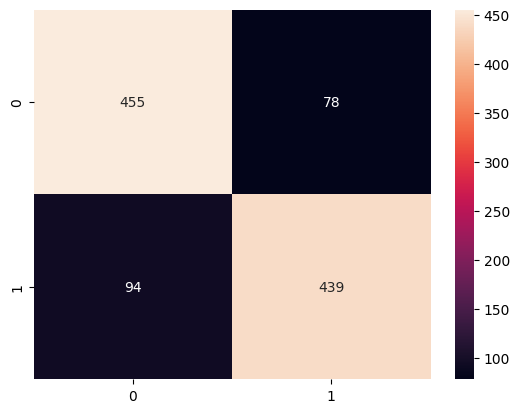

In [9]:
cf_matrix = confusion_matrix(dataset['test']['label'], pred_labels)
sns.heatmap(cf_matrix, annot=True, fmt=".0f")
plt.show()